## Content list

#### 1. Import libraries
#### 2. Import data
#### 3. Data Filtering
#### 4. Correlations
#### 5. Scatterplot
#### 6. Pair plot
#### 7. Categorical plot
#### 8. Revisiting key questions
#### 9. Hypothesis

## 1. Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import datetime as dt

## 2. Import data

In [2]:
# Turn project folder path into a string
path = r'C:\Users\Admin\Desktop\Data Analysis\Advanced Analytics & Dashboard Design\Competitive_LoL_Analysis'

In [3]:
path

'C:\\Users\\Admin\\Desktop\\Data Analysis\\Advanced Analytics & Dashboard Design\\Competitive_LoL_Analysis'

In [4]:
# Import league competitive data
df_lol = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'competitve_data_cleaned.csv'), index_col = False)

In [5]:
# Check output
df_lol.head()

gameid league  year        date  game  patch  participantid  side  \
0  LOLTMNT06_13630    LEC  2024  2024-01-13     1  14.01              1  Blue   
1  LOLTMNT06_13630    LEC  2024  2024-01-13     1  14.01              2  Blue   
2  LOLTMNT06_13630    LEC  2024  2024-01-13     1  14.01              3  Blue   
3  LOLTMNT06_13630    LEC  2024  2024-01-13     1  14.01              4  Blue   
4  LOLTMNT06_13630    LEC  2024  2024-01-13     1  14.01              5  Blue   

  position  champion  ... assists teamkills teamdeaths damagetochampions  \
0      top  Renekton  ...       3        10         14             10063   
1      jng  Nocturne  ...       2        10         14              4562   
2      mid     Akali  ...       1        10         14             11408   
3      bot   Kalista  ...       2        10         14              6014   
4      sup      Pyke  ...       3        10         14              3124   

  damageshare totalgold golddiffat15 xpdiffat15  kda  region  
0    0.286116     12202       1690.0     -346.0  2.0  Europe  
1    0.129709      9892       -378.0       74.0  2.0  Europe  
2    0.324358     10279        279.0     -330.0  1.0  Europe  
3    0.170993     11703        213.0     1319.0  2.0  Europe  
4    0.088823      7580        -75.0    -1313.0  1.0  Europe  

[5 rows x 34 columns]

## 3. Data filtering

In [6]:
# Print the name of columns and columns type in df_lol
df_lol.dtypes

gameid                object
league                object
year                   int64
date                  object
game                   int64
patch                float64
participantid          int64
side                  object
position              object
champion              object
ban1                  object
ban2                  object
ban3                  object
ban4                  object
ban5                  object
pick1                 object
pick2                 object
pick3                 object
pick4                 object
pick5                 object
gamelength             int64
result                 int64
kills                  int64
deaths                 int64
assists                int64
teamkills              int64
teamdeaths             int64
damagetochampions      int64
damageshare          float64
totalgold              int64
golddiffat15         float64
xpdiffat15           float64
kda                  float64
region                object
dtype: object

In [7]:
# Filter Dataset with suitable numeric (int, float) columns for exploring correlations
df_numeric = df_lol.select_dtypes(include=['int', 'float'])

In [8]:
# Checking df_numeric data frame
df_numeric.head()

year  game  patch  participantid  gamelength  result  kills  deaths  \
0  2024     1  14.01              1        1749       0      3       3   
1  2024     1  14.01              2        1749       0      2       2   
2  2024     1  14.01              3        1749       0      2       3   
3  2024     1  14.01              4        1749       0      2       2   
4  2024     1  14.01              5        1749       0      1       4   

   assists  teamkills  teamdeaths  damagetochampions  damageshare  totalgold  \
0        3         10          14              10063     0.286116      12202   
1        2         10          14               4562     0.129709       9892   
2        1         10          14              11408     0.324358      10279   
3        2         10          14               6014     0.170993      11703   
4        3         10          14               3124     0.088823       7580   

   golddiffat15  xpdiffat15  kda  
0        1690.0      -346.0  2.0  
1        -378.0        74.0  2.0  
2         279.0      -330.0  1.0  
3         213.0      1319.0  2.0  
4         -75.0     -1313.0  1.0

In [9]:
# Dropping irrelevant numeric columns
df_numeric = df_numeric.drop(columns = ['year','game','participantid','patch'])

In [10]:
# Checking df_numeric data frame
df_numeric.head()

gamelength  result  kills  deaths  assists  teamkills  teamdeaths  \
0        1749       0      3       3        3         10          14   
1        1749       0      2       2        2         10          14   
2        1749       0      2       3        1         10          14   
3        1749       0      2       2        2         10          14   
4        1749       0      1       4        3         10          14   

   damagetochampions  damageshare  totalgold  golddiffat15  xpdiffat15  kda  
0              10063     0.286116      12202        1690.0      -346.0  2.0  
1               4562     0.129709       9892        -378.0        74.0  2.0  
2              11408     0.324358      10279         279.0      -330.0  1.0  
3               6014     0.170993      11703         213.0      1319.0  2.0  
4               3124     0.088823       7580         -75.0     -1313.0  1.0

## 4. Correlations

In [11]:
# Create a correlation matrix
df_numeric.corr()

gamelength        result     kills    deaths   assists  \
gamelength         1.000000e+00 -3.789077e-17  0.079509  0.083487  0.107721   
result            -3.789077e-17  1.000000e+00  0.296586 -0.310837  0.332671   
kills              7.950903e-02  2.965862e-01  1.000000  0.460632  0.842243   
deaths             8.348740e-02 -3.108373e-01  0.460632  1.000000  0.472665   
assists            1.077210e-01  3.326708e-01  0.842243  0.472665  1.000000   
teamkills          1.869893e-01  6.975114e-01  0.425206 -0.110694  0.449959   
teamdeaths         1.867734e-01 -6.953879e-01 -0.105297  0.446998 -0.130020   
damagetochampions  2.228142e-01  9.864731e-02  0.838202  0.676106  0.786883   
damageshare        5.556744e-09  1.368542e-08  0.497738 -0.128813 -0.261920   
totalgold          1.782205e-01  8.845208e-02  0.817718  0.709254  0.801605   
golddiffat15       5.030710e-19  3.052253e-01  0.272749 -0.250637  0.207642   
xpdiffat15         1.502010e-18  2.545086e-01  0.212328 -0.208441  0.161018   
kda               -6.419321e-02  6.426791e-01  0.329204 -0.343133  0.345948   

                      teamkills    teamdeaths  damagetochampions  \
gamelength         1.869893e-01  1.867734e-01           0.222814   
result             6.975114e-01 -6.953879e-01           0.098647   
kills              4.252062e-01 -1.052973e-01           0.838202   
deaths            -1.106939e-01  4.469984e-01           0.676106   
assists            4.499588e-01 -1.300199e-01           0.786883   
teamkills          1.000000e+00 -2.476382e-01           0.187743   
teamdeaths        -2.476382e-01  1.000000e+00           0.029517   
damagetochampions  1.877433e-01  2.951667e-02           1.000000   
damageshare       -1.389600e-08 -3.650847e-08           0.806423   
totalgold          1.178240e-01 -2.231292e-02           0.943457   
golddiffat15       2.903841e-01 -2.893628e-01           0.098163   
xpdiffat15         2.341413e-01 -2.338230e-01           0.077358   
kda                5.606961e-01 -5.838673e-01           0.113401   

                    damageshare  totalgold  golddiffat15    xpdiffat15  \
gamelength         5.556744e-09   0.178220  5.030710e-19  1.502010e-18   
result             1.368542e-08   0.088452  3.052253e-01  2.545086e-01   
kills              4.977382e-01   0.817718  2.727489e-01  2.123276e-01   
deaths            -1.288126e-01   0.709254 -2.506367e-01 -2.084406e-01   
assists           -2.619200e-01   0.801605  2.076416e-01  1.610182e-01   
teamkills         -1.389600e-08   0.117824  2.903841e-01  2.341413e-01   
teamdeaths        -3.650847e-08  -0.022313 -2.893628e-01 -2.338230e-01   
damagetochampions  8.064232e-01   0.943457  9.816339e-02  7.735823e-02   
damageshare        1.000000e+00   0.573325  1.409434e-01  1.107219e-01   
totalgold          5.733252e-01   1.000000  7.912206e-02  6.686354e-02   
golddiffat15       1.409434e-01   0.079122  1.000000e+00  7.538614e-01   
xpdiffat15         1.107219e-01   0.066864  7.538614e-01  1.000000e+00   
kda                7.867869e-02   0.107186  3.481601e-01  2.765613e-01   

                        kda  
gamelength        -0.064193  
result             0.642679  
kills              0.329204  
deaths            -0.343133  
assists            0.345948  
teamkills          0.560696  
teamdeaths        -0.583867  
damagetochampions  0.113401  
damageshare        0.078679  
totalgold          0.107186  
golddiffat15       0.348160  
xpdiffat15         0.276561  
kda                1.000000

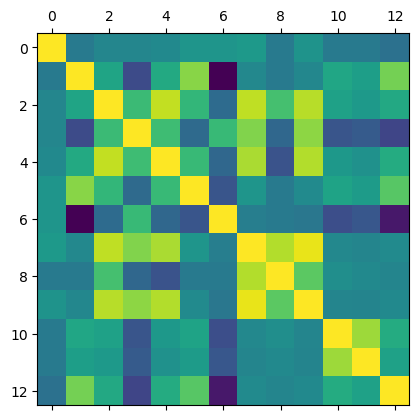

In [12]:
# Create a correlation heatmap with matplotlib
plt.matshow(df_numeric.corr())
plt.show()

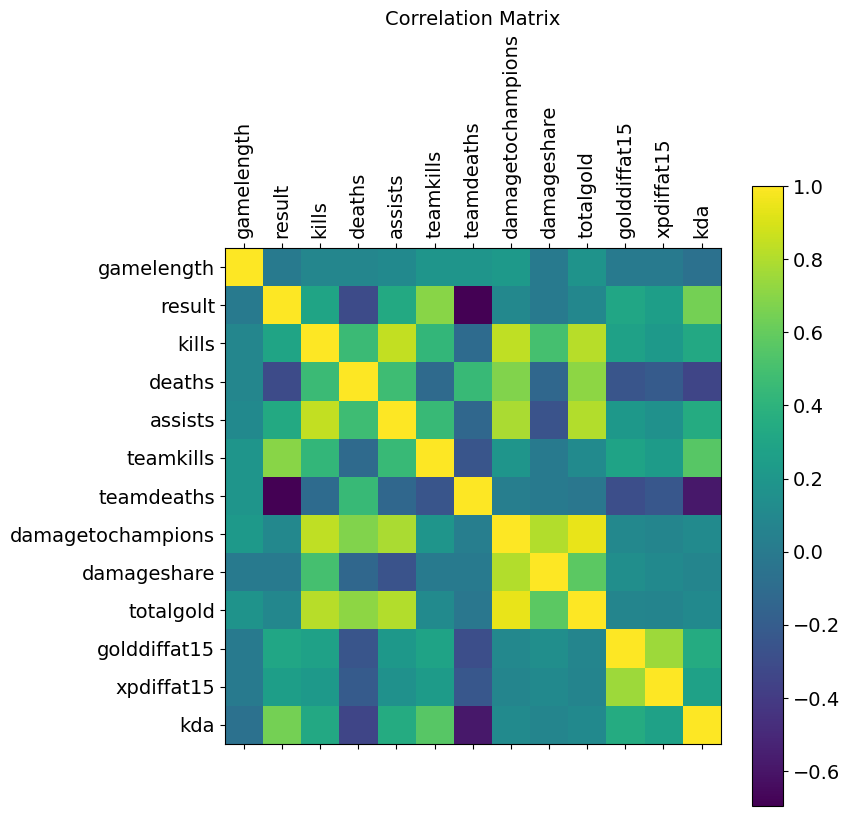

In [13]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_numeric.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_numeric.shape[1]), df_numeric.columns, fontsize=14, rotation=90) # x axis labels
plt.yticks(range(df_numeric.shape[1]), df_numeric.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'correlation_matplotlib.png'), bbox_inches = 'tight'); # save figure

#### As seen in the correlations heatmap, the darker color square represent the strong negative relationship between two variables, while the lighter color square represent the strong positive relationship between the two variables.

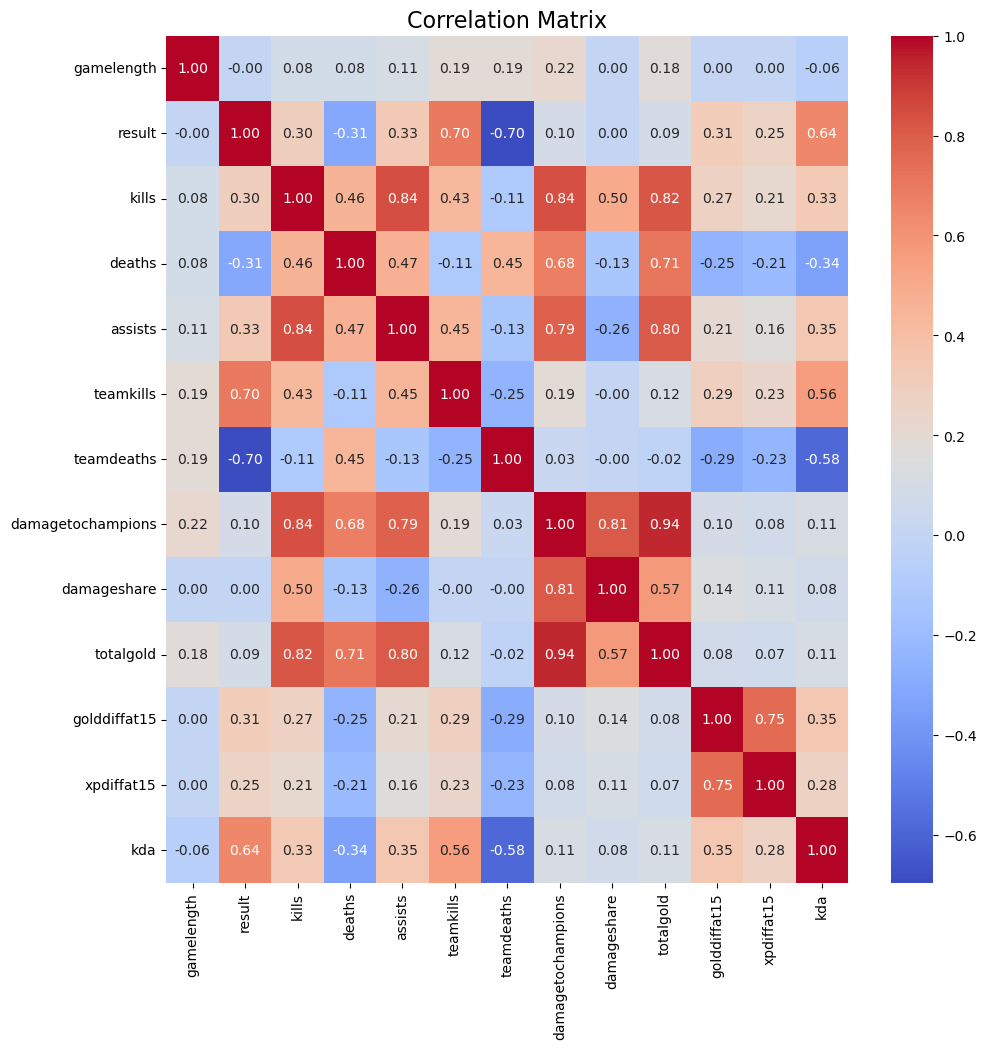

In [14]:
# Create correlation heatmap with seaborn

f,ax = plt.subplots(figsize=(11,11))
corr = sns.heatmap(df_numeric.corr(), annot = True, fmt = '.2f', cmap='coolwarm', ax = ax) # annotate matrix with correlation figures
ax.set_title('Correlation Matrix', fontsize = 16) # add a title
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'correlation_seaborn.png'), bbox_inches = 'tight'); # save figure

#### As seen from the heatmap created with seaborn, the darker blue color square represent the strong negative relationship between two variables, while the darker color square represent the strong positive relationship between the two variables. With seaborn, we are also able to see the numerical coefficient in each of the square, for value close to 1, it represent strong positive relationship while value closer to -1 represent strong negative relationship.

## 5. Scatterplot

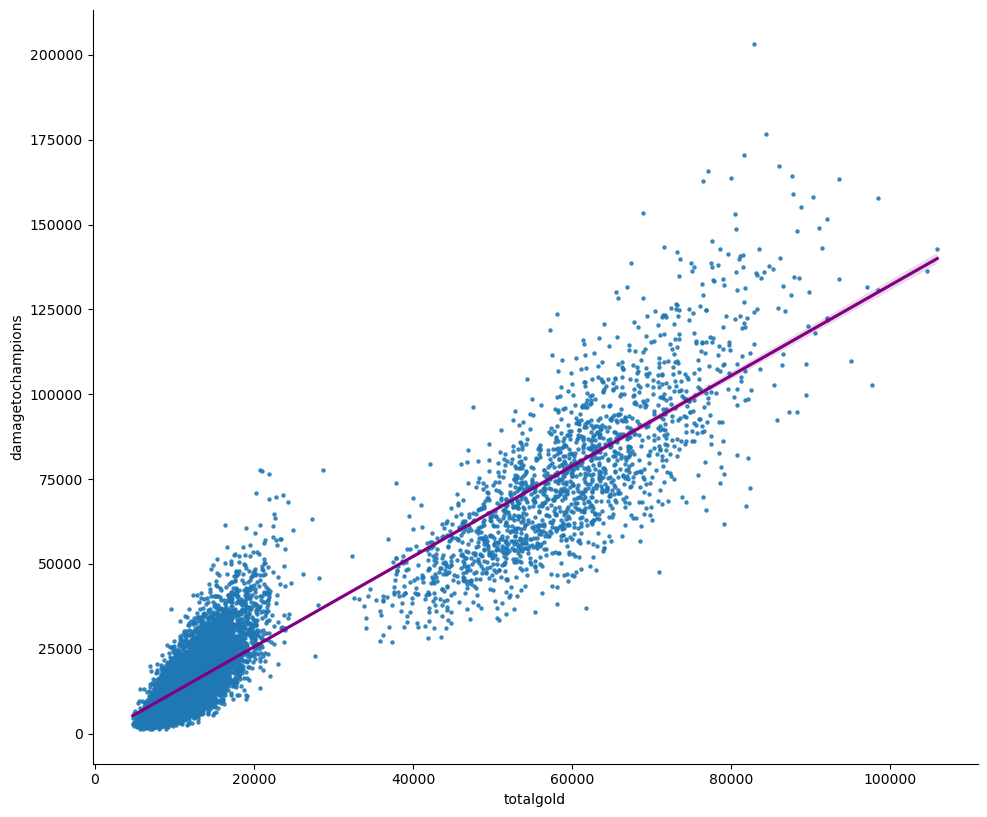

In [15]:
# Create a scatterplot for 'goldiffat15' and 'xpdiffat15' (Strongest correlations with 0.94 coefficient)
sns.lmplot(x = 'totalgold', y = 'damagetochampions', data = df_numeric, height=8.27, aspect=11.7/9.7, scatter_kws={"s": 5}, line_kws={'color': 'purple'})
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot.png'), bbox_inches = 'tight'); # save figure

#### This scatter plot shows that damagetochampions have a strong positive correlation with totalgold, as when damagetochampions increase, the totalgold value also increases. This is what is expected in the game as when a player deal more damage to an enemy champions, it will most likely kill the enemy which results in the team earning more gold.

## 6. Pair plot

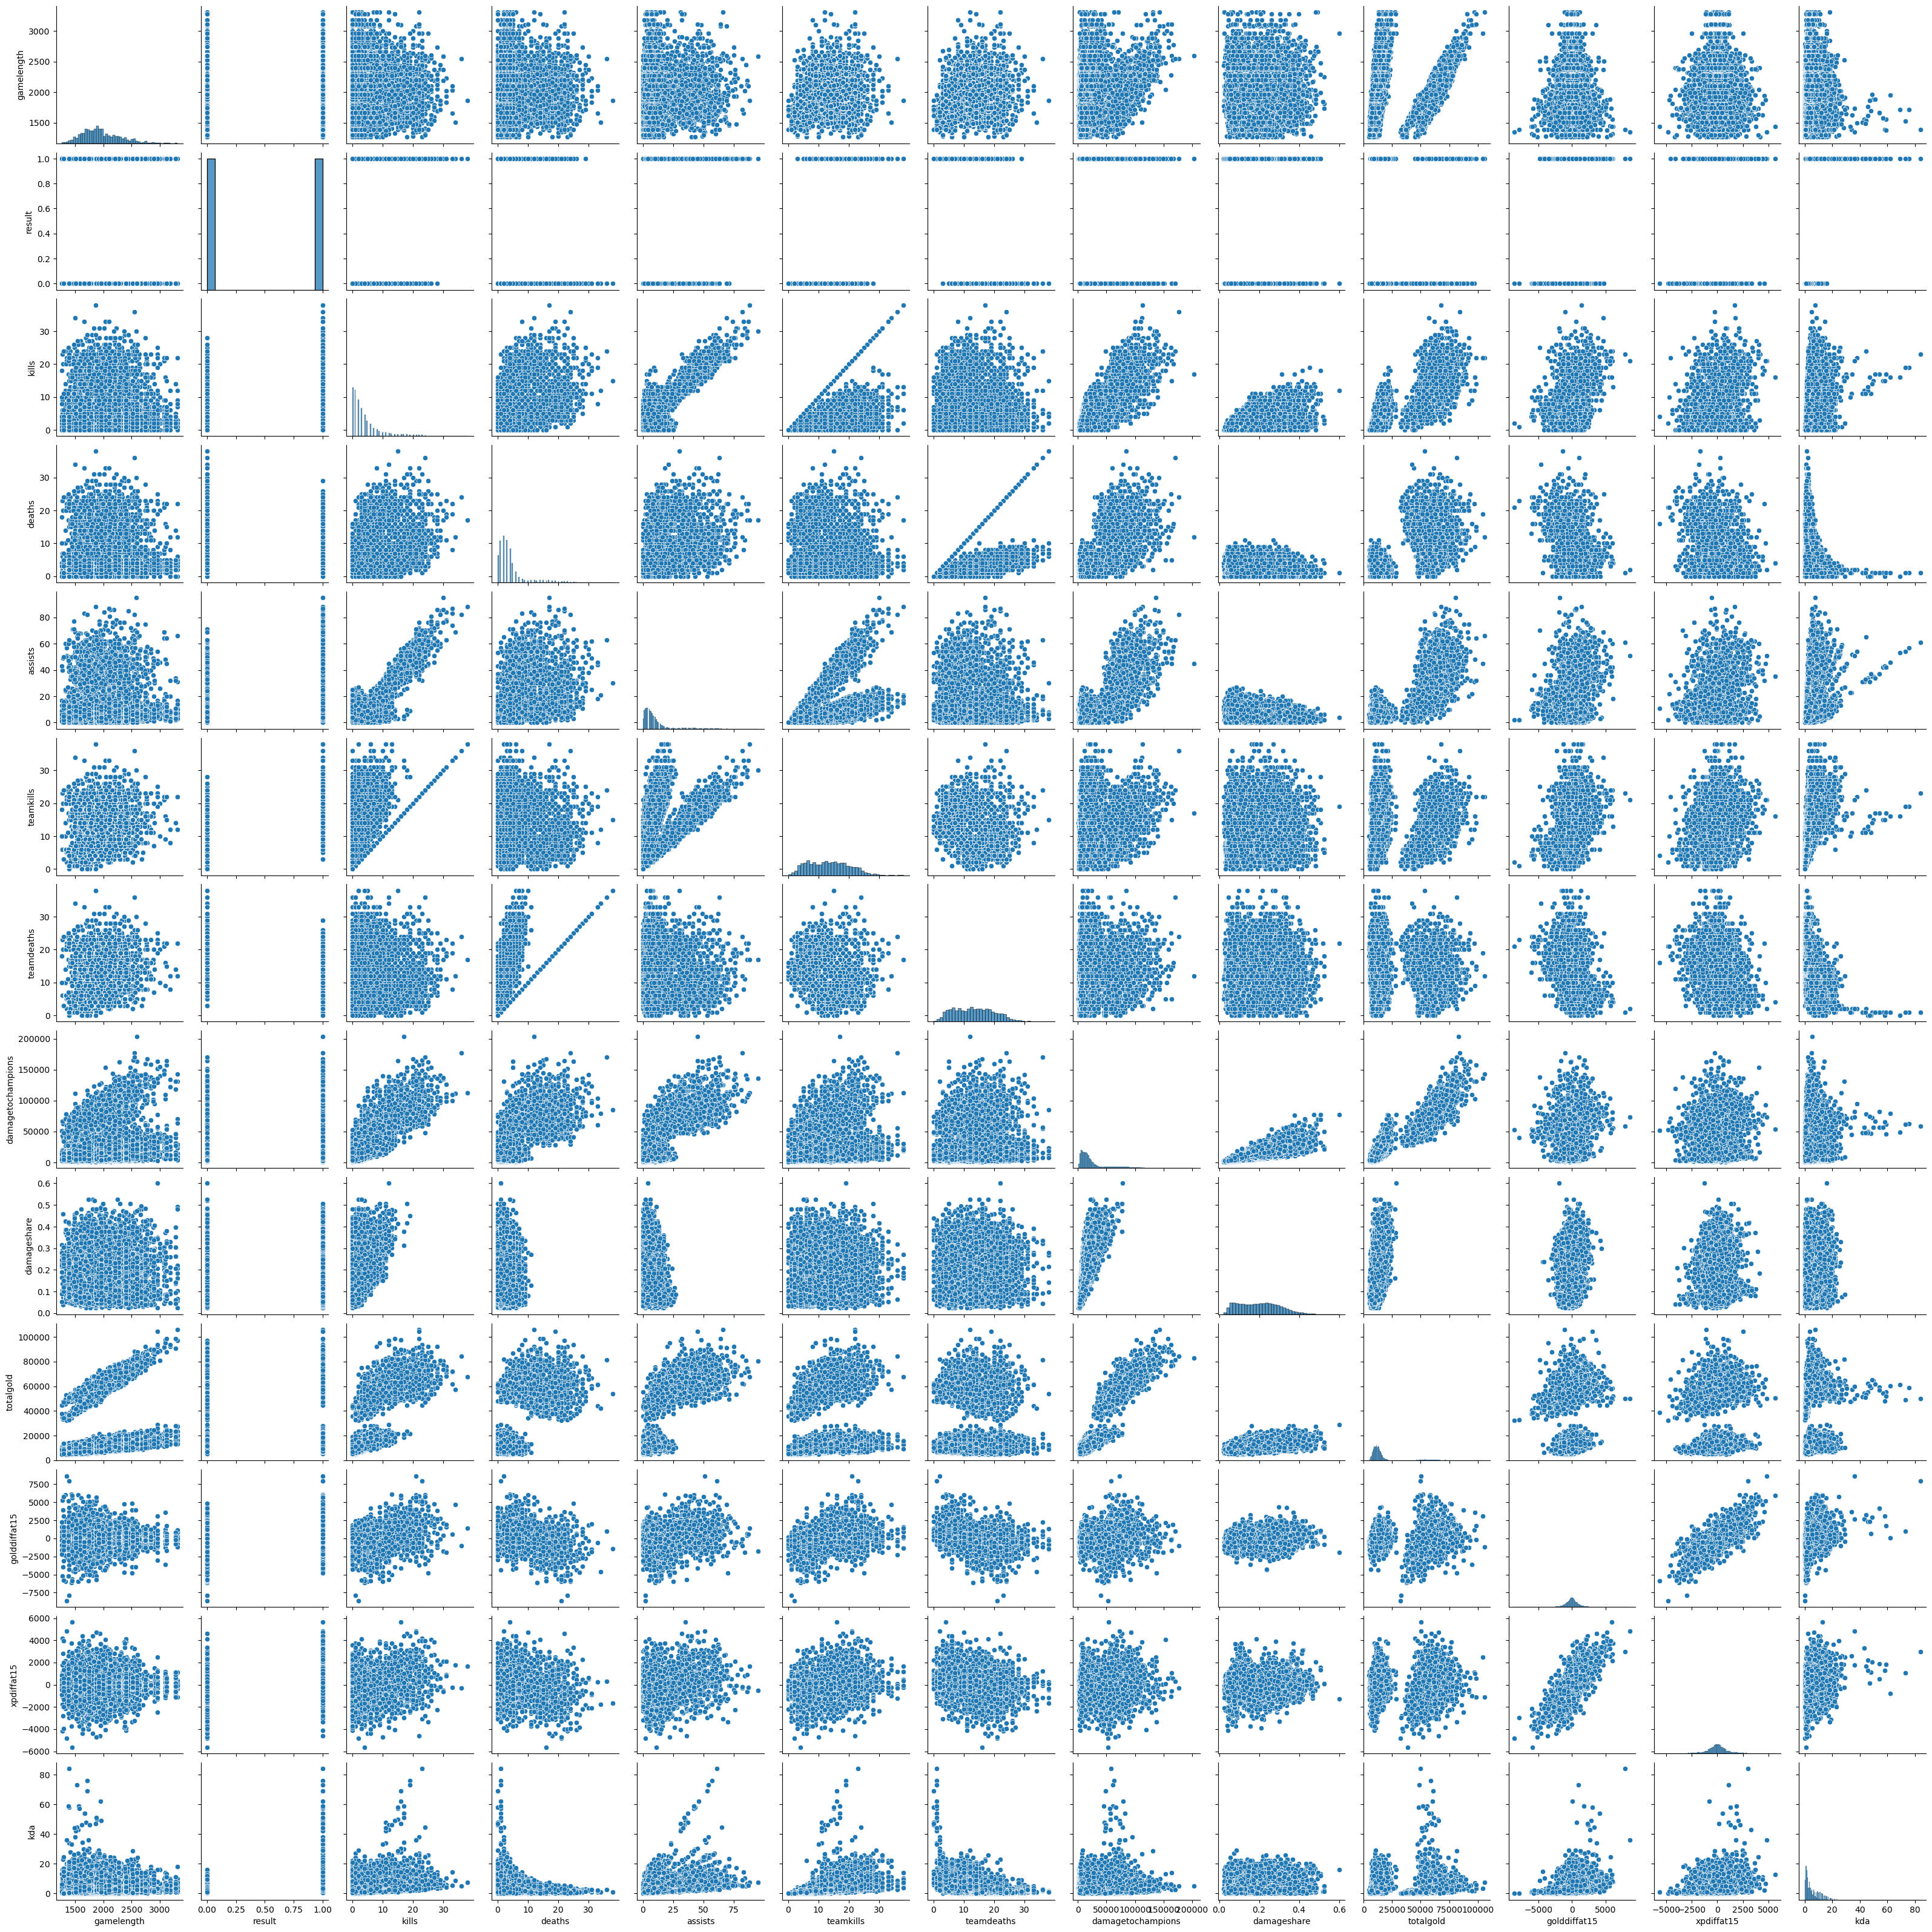

In [16]:
# create a pair plot 

df_pairplot = sns.pairplot(df_numeric)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pairplot.png'), bbox_inches = 'tight'); # save figure

#### Not much remarkable insights was spotted from these plots. Could be due the type of data this data set contains.

## 7. Categorical plot

In [17]:
# Check for columns to determine which columns can be use for categorical plot
df_lol.dtypes

gameid                object
league                object
year                   int64
date                  object
game                   int64
patch                float64
participantid          int64
side                  object
position              object
champion              object
ban1                  object
ban2                  object
ban3                  object
ban4                  object
ban5                  object
pick1                 object
pick2                 object
pick3                 object
pick4                 object
pick5                 object
gamelength             int64
result                 int64
kills                  int64
deaths                 int64
assists                int64
teamkills              int64
teamdeaths             int64
damagetochampions      int64
damageshare          float64
totalgold              int64
golddiffat15         float64
xpdiffat15           float64
kda                  float64
region                object
dtype: object

In [18]:
# Filter out the data set to only contain position data
df_lol_pos = df_lol.loc[df_lol['position'] != 'team']

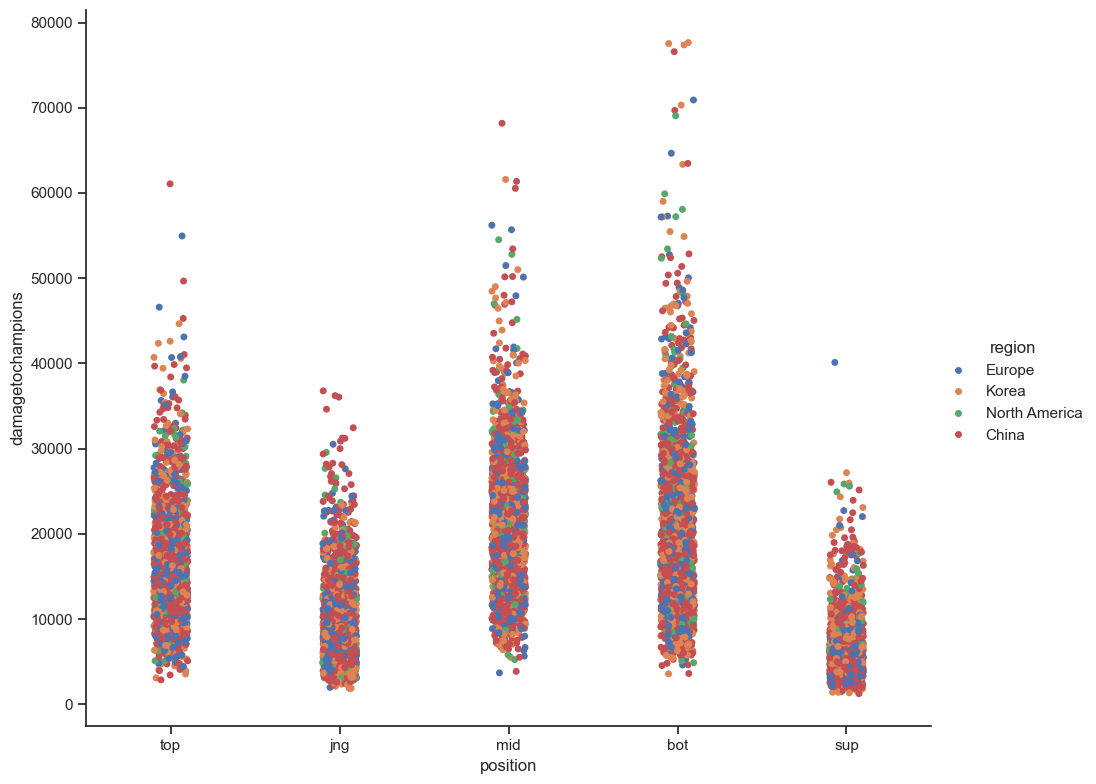

In [19]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
sns.catplot(x="position", y="damagetochampions", hue="region", data=df_lol_pos, height=8, aspect=11.7/9.7)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'catplot_damage.png'), bbox_inches = 'tight'); # save figure

#### This category plot shows us to see which regions have the best damage performance on the different positions. 
#### We can see that the damage leader for the different positions are as follow:

#### 1. Top - China
#### 2. Jng - China
#### 3. Mid - China
#### 4. Bot - Korea
#### 5. Sup - Europe

## 8. Revisiting key questions

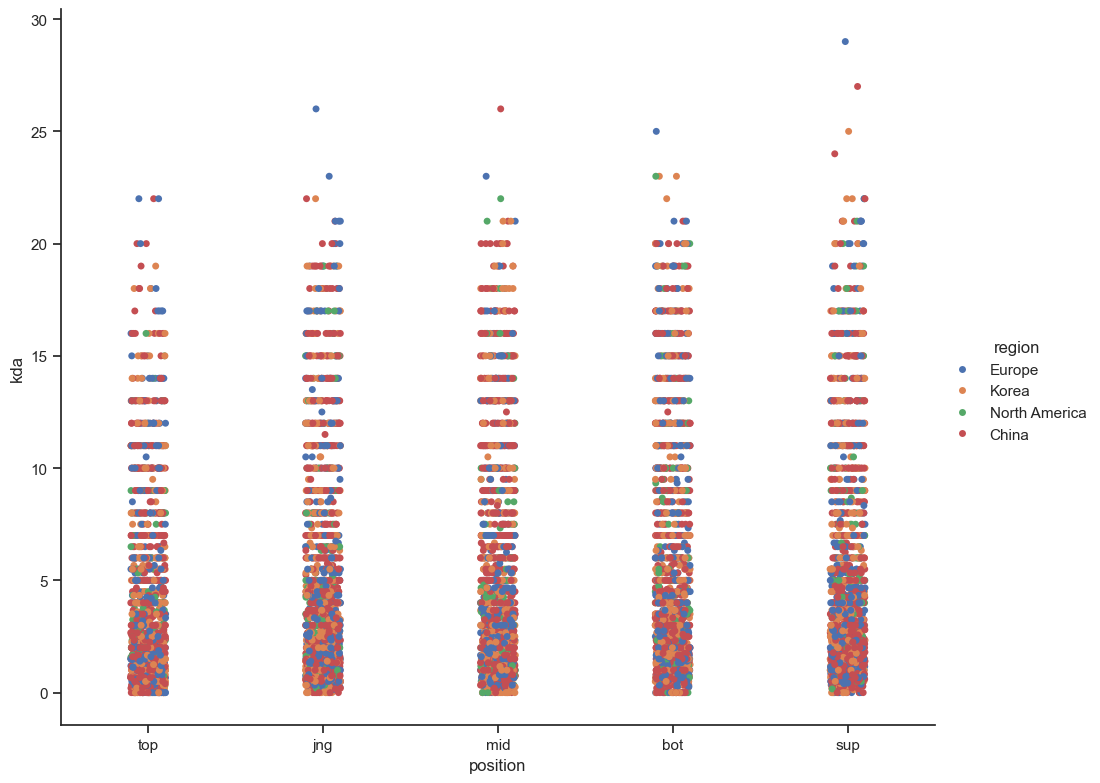

In [20]:
# Create a categorical plot to see the performance of each role in each region (LCK, LCS, LEC, LPL) based on kda

sns.set(style="ticks")
sns.catplot(x="position", y="kda", hue="region", data=df_lol_pos, height=8, aspect=11.7/9.7)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'catplot_kda.png'), bbox_inches = 'tight'); # save figure

#### This category plot shows us to see which regions have the best kda performance on the different positions. 
#### We can see that the damage leader for the different positions are as follow:

#### 1. Top - Europe
#### 2. Jng - Europe
#### 3. Mid - China
#### 4. Bot - Europe
#### 5. Sup - Europe

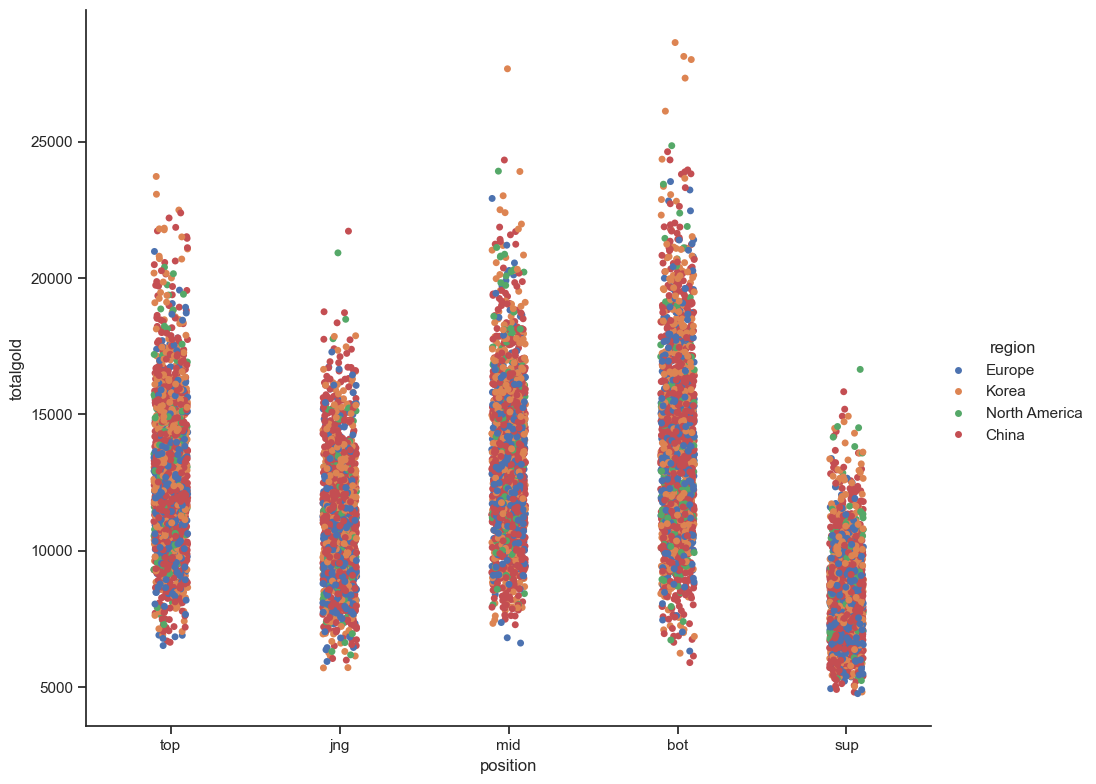

In [21]:
# Create a categorical plot to see the performance of each role in each region (LCK, LCS, LEC, LPL) based on total gold

sns.set(style="ticks")
sns.catplot(x="position", y="totalgold", hue="region", data=df_lol_pos, height=8, aspect=11.7/9.7)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'catplot_gold.png'), bbox_inches = 'tight'); # save figure

#### This category plot shows us to see which regions have the best gold generated performance on the different positions. 
#### We can see that the damage leader for the different positions are as follow:

#### 1. Top - Korea
#### 2. Jng - China
#### 3. Mid - Korea
#### 4. Bot - Korea
#### 5. Sup - North America

In [28]:
# Filter out the data set to only contain team data
df_lol_team = df_lol.loc[df_lol['position'] == 'team']

In [39]:
# Filter out the data set to only contain winning team
df_lol_team_win = df_lol_team.loc[df_lol_team['result'] == 1]

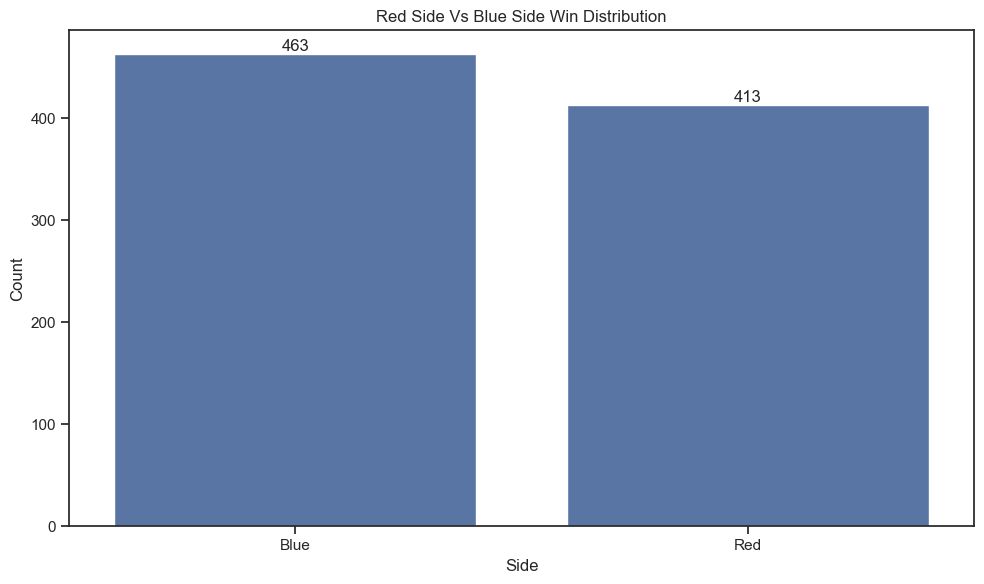

In [33]:
#Create a bar chart to show win distribution based on side

#Get the top 5 industries by count
side_win = df_lol_team_win['side'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
ab=sns.barplot(x=side_win.index, y=side_win.values)
plt.xlabel('Side')
plt.ylabel('Count')
plt.title('Red Side Vs Blue Side Win Distribution')
ab.bar_label(ab.containers[0])
plt.tight_layout()

#### Choosing blue side seems to have a slight advantage in achieving a win the game.

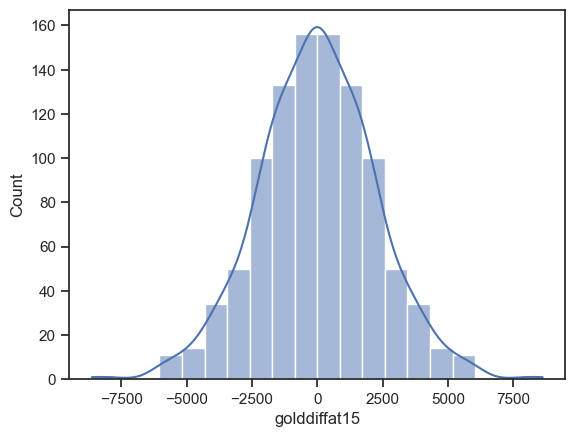

In [46]:
# Create a histogram to show the data on team gold diff at 15minute
sns.histplot(data=df_lol_team, x='golddiffat15', bins=20, kde=True)

plt.show()  # Show the plot

In [48]:
# Create category to classify gold diff. golddiffat15 < -2500 == 'Huge gold loss'
df_lol_team.loc[df_lol_team['golddiffat15'] < -2500, 'Gold diff category'] = 'Huge gold loss'

In [49]:
# Create category to classify gold diff. golddiffat15 from -2500 to <0 == 'Small gold loss'
df_lol_team.loc[(df_lol_team['golddiffat15'] >= -2500) & (df_lol_team['golddiffat15'] < 0), 'Gold diff category'] = 'Small gold loss'

In [50]:
# Create category to classify gold diff. golddiffat15 from 0 to 2500 == 'Small gold lead'
df_lol_team.loc[(df_lol_team['golddiffat15'] >= 0) & (df_lol_team['golddiffat15'] <= 2500), 'Gold diff category'] = 'Small gold lead'

In [51]:
# Create category to classify gold diff. golddiffat15 > 2500 == 'Huge gold lead'
df_lol_team.loc[df_lol_team['golddiffat15'] > 2500, 'Gold diff category'] = 'Huge gold lead'

In [56]:
# Filter out the data set for lpl games as they do not contain gold diff information
df_lol_team_nolpl = df_lol_team.loc[df_lol_team['region'] != 'China']

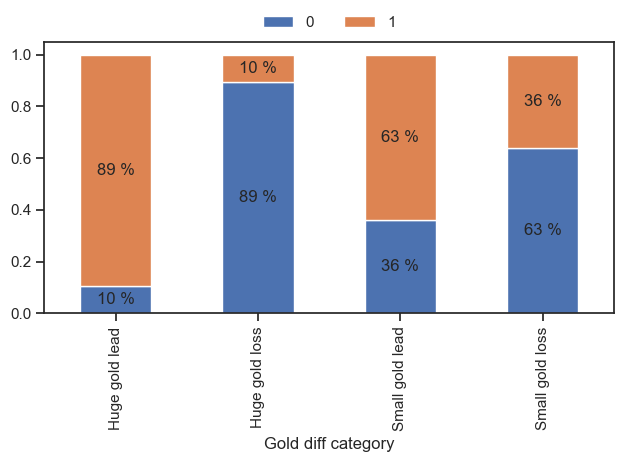

In [60]:
x_var, y_var = "Gold diff category", "result"
df_grouped = df_lol_team_nolpl.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)
df_grouped.plot.bar(stacked=True)
plt.legend(
        bbox_to_anchor=(0.5, 1.02),
        loc="lower center",
        borderaxespad=0,
        frameon=False,
        ncol=3,
    )
for ix, row in df_grouped.reset_index(drop=True).iterrows():
    cumulative = 0
    for element in row:
        if element == element and element > 0.1:
            plt.text(
                ix,
                cumulative + element / 2,
                f"{int(element * 100)} %",
                va="center",
                ha="center",
                )
        cumulative += element
plt.tight_layout()

#### Seems like whenever a team have a gold lead (golddiffat15 >= 0), they will have an advantage in winning the game. Once the gold lead exceed 2500, it is very likely that the team will win the game.

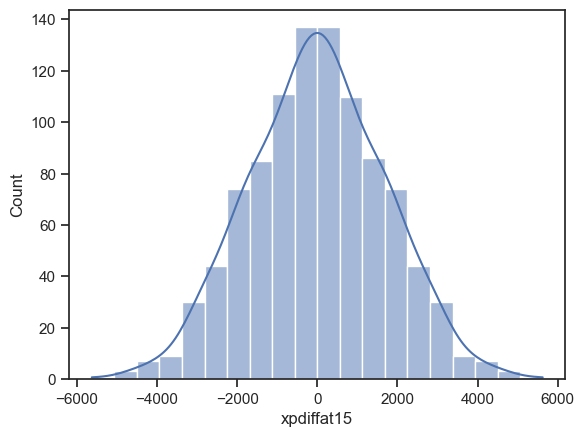

In [61]:
# Create a histogram to show the data on xp diff at 15minute
sns.histplot(data=df_lol_team, x='xpdiffat15', bins=20, kde=True)

plt.show()  # Show the plot

In [63]:
# Create category to classify xp diff. xpdiffat15 < -2000 == 'Huge xp loss'
df_lol_team.loc[df_lol_team['xpdiffat15'] < -2000, 'XP diff category'] = 'Huge xp loss'

In [64]:
# Create category to classify xp diff. xpdiffat15 from -2000 to <0 == 'Small xp loss'
df_lol_team.loc[(df_lol_team['xpdiffat15'] >= -2000) & (df_lol_team['xpdiffat15'] < 0), 'XP diff category'] = 'Small xp loss'

In [65]:
# Create category to classify xp diff. xpdiffat15 from 0 to 2000 == 'Small xp lead'
df_lol_team.loc[(df_lol_team['xpdiffat15'] >= 0) & (df_lol_team['xpdiffat15'] <= 2000), 'XP diff category'] = 'Small xp lead'

In [66]:
# Create category to classify xp diff. xpdiffat15 > 2000 == 'Huge xp lead'
df_lol_team.loc[df_lol_team['xpdiffat15'] > 2000, 'XP diff category'] = 'Huge xp lead'

In [67]:
# Filter out the data set for lpl games as they do not contain gold diff information
df_lol_team_nolpl = df_lol_team.loc[df_lol_team['region'] != 'China']

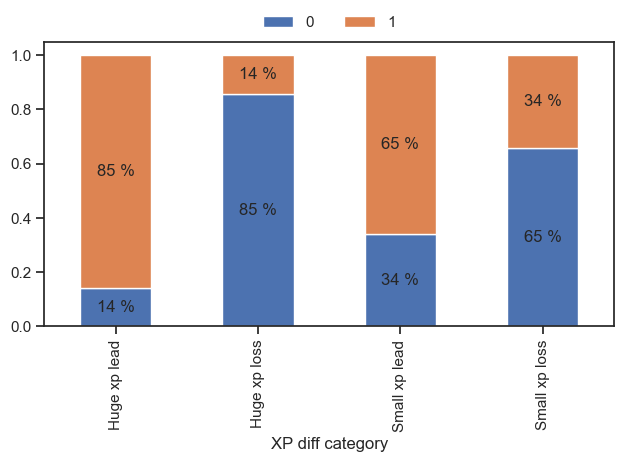

In [68]:
x_var, y_var = "XP diff category", "result"
df_grouped = df_lol_team_nolpl.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)
df_grouped.plot.bar(stacked=True)
plt.legend(
        bbox_to_anchor=(0.5, 1.02),
        loc="lower center",
        borderaxespad=0,
        frameon=False,
        ncol=3,
    )
for ix, row in df_grouped.reset_index(drop=True).iterrows():
    cumulative = 0
    for element in row:
        if element == element and element > 0.1:
            plt.text(
                ix,
                cumulative + element / 2,
                f"{int(element * 100)} %",
                va="center",
                ha="center",
                )
        cumulative += element
plt.tight_layout()

#### Seems like whenever a team have a xp lead (xpdiffat15 >= 0), they will have an advantage in winning the game. Once the xp lead exceed 2000, it is very likely that the team win the game.

### Question Answered

### 1. What is the performance of each role in each region (LCK, LCS, LEC, LPL)? Performance based on the following:

### KDA:
#### 1. Top - Europe
#### 2. Jng - Europe
#### 3. Mid - China
#### 4. Bot - Europe
#### 5. Sup - Europe

### Gold Generated Per Game:
#### 1. Top - Korea
#### 2. Jng - China
#### 3. Mid - Korea
#### 4. Bot - Korea
#### 5. Sup - North America

### Damage Dealt Per Game:
#### 1. Top - China
#### 2. Jng - China
#### 3. Mid - China
#### 4. Bot - Korea
#### 5. Sup - Europe

### 2. Do the following factors below affect the game win rate?

### Choosing blue or red side for the team?
#### Ans: Choosing blue side seems to have a slight advantage in achieving a win the game.

### Team Gold difference at 15 minutes?
#### Ans: Seems like whenever a team have a gold lead (golddiffat15 >= 0), they will have an advantage in winning the game. Once the gold lead exceed 2500, it is very likely that the team will win the game.

###  Team XP difference at 15 minutes?
#### Ans: Seems like whenever a team have a xp lead (xpdiffat15 >= 0), they will have an advantage in winning the game. Once the xp lead exceed 2000, it is very likely that the team win the game.

## 9. Hypothesis

### 1. Whenever a team choose blue side, they are more likely to win the game.

### 2. When the team have a gold lead of 2500 at the 15 minute mark of the game, they are most likely to win the game.

### 3. When the team have a xp lead of 2000 at the 15 minute mark of the game, they are most likely to win the game.